Problem Statement 3: DBSCAN ClusteringLoad the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:

Find the correlation among the all the columns and drop the column/s with the least correlation

2.Encode the "Gender" column using get_dummies() function

3.Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

4.Print the size of each cluster and also the size of outliers' cluster

5.Using a scatter plot shows how annual income corresponds to the spending rates of customers


In [172]:
import pandas as pd
import numpy as np
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.offline as pyo
import plotly.graph_objs as go;
import pandas_datareader as datareader
import datetime as dt
import math
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [173]:
data=pd.read_csv("D:\Shivam\study material\CSV\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [175]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [176]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Having no null values

#### 1 Find the correlation among the all the columns and drop the column/s with the least correlation

In [177]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


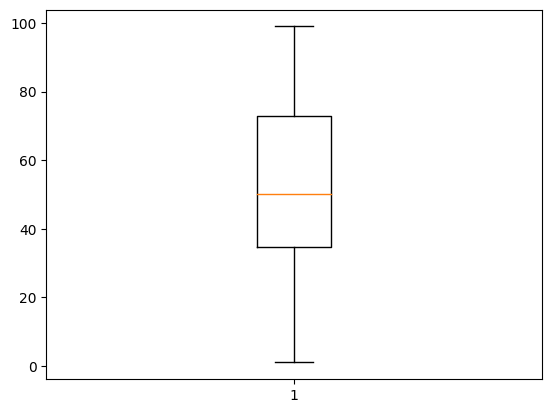

In [178]:
mp.boxplot(data['Spending Score (1-100)'])
mp.show()

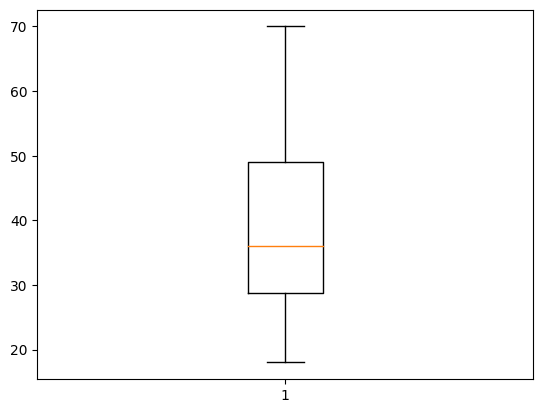

In [179]:
mp.boxplot(data['Age'])
mp.show()

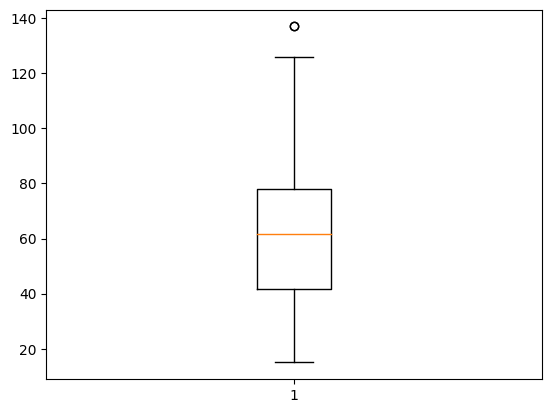

In [180]:
mp.boxplot(data['Annual Income (k$)'])
mp.show()

In [181]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [182]:
data.drop('CustomerID',axis=1,inplace=True)

In [183]:
dummy=pd.get_dummies(data['Gender'])
data.drop('Gender',axis=1,inplace=True)
dummy=pd.DataFrame(dummy)
dummy.head()


,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [184]:
data['Male']=dummy['Male']
data['Female']=dummy['Female']


In [185]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Female
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1


In [186]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit(data)
data=st.fit_transform(data)

In [188]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(data)

DBSCAN(eps=0.4, min_samples=20)